<h2> SVM method for multi-class classfication </h2>

<h3> Recap of SVM. Implementation of a model and fitting using GD </h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class SVM_grad_descent:
    d: int
    w: np.array
    b: float
    ls: np.array
    alpha: float = .1

    def mulmat(self, a: np.array, M: np.array) -> np.array:
        return (M.T * a).T

    def _loss(self, X: np.array, Y: np.array) -> float:
        return .5 * np.inner(self.w, self.w) - np.sum( self.ls * Y * (X.dot(self.w) + self.b * np.ones(Y.shape)) )

    def _grad(self, X, Y) -> np.array:
        grad_w = self.w - np.sum(self.mulmat(self.ls * Y, X), axis=0)
        grad_b = -np.sum(self.ls * Y)
        grad_ls = np.ones(Y.shape) - Y * (X.dot(self.w) + self.b * np.ones(Y.shape))
        return grad_w, grad_b, grad_ls

    def __init__(self, d: int):
        self.d = d
        self.w = np.random.normal(size=(d, ))
        self.b = np.random.normal()

    def predict(self, x_new: np.array) -> float:
        return np.sign(self.w.dot(x_new) + self.b)

    def fit(self, X, Y, max_iter=100) -> None:
        n = X.shape[0]
        self.ls = np.random.uniform(size=(n, ))
        for t in range(max_iter):
            grad_w, grad_b, grad_ls = self._grad(X, Y)
            self.w = self.w - self.alpha * grad_w
            self.b = self.b - self.alpha * grad_b
            self.ls = self.ls + self.alpha * grad_ls
            self.ls = np.clip(self.ls, 0, None)

In [3]:
X_1 = np.random.multivariate_normal(np.array([6, 6]), 4 * np.eye(2), size=(50, ))
X_2 = np.random.multivariate_normal(np.array([10, 2]), np.eye(2), size=(50, ))
X = np.vstack((X_1, X_2))
Y = np.array([1 for _ in range(50)] + [-1 for _ in range(50)])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)

In [14]:
svm_grad = SVM_grad_descent(2)

In [15]:
svm_grad.fit(X_train, Y_train)

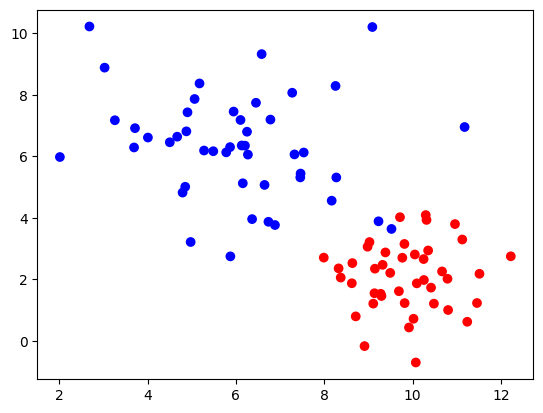

In [16]:
fig, axes = plt.subplots()
axes.scatter(X_train[:, 0], X_train[:, 1], color=['red' if y == -1 else 'blue' for y in Y_train])

In [17]:
x = np.arange(0, 12, 0.5)
w = svm_grad.w
b = svm_grad.b
axes.plot(x, -w[0] / w[1] * x - b / w[1])

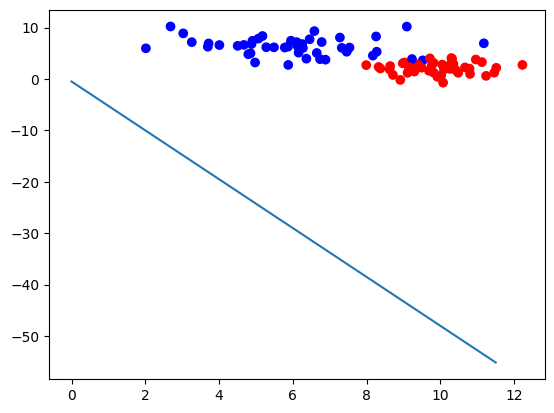

In [18]:
fig

The results demonstrate the insufficiency of the gradient descent method for solving the constraint problem. Instead of Lagrange dual problem, the Hinge loss could be used to decrease the loss effectively.

## Hinge loss SVM

In [19]:
def mulmat(a: np.array, M: np.array) -> np.array:
    return (M.T * a).T

class HSVM:
    w: np.array
    b: np.array
    alpha: float = .05

    def _loss(self, X: np.array, Y: np.array) -> np.array:
        Margin = Y * (X.dot(self.w) + np.ones(Y.size) * self.b)
        return np.sum(np.maximum(np.zeros(Y.size), np.ones(Y.size) - Margin))

    def _gradW(self, X: np.array, Y: np.array) -> np.array:
        Margin = Y * (X.dot(self.w) + np.ones(Y.size) * self.b)
        loss = np.ones(Y.size) - Margin

        grad = -mulmat(Y, X)
        grad[loss < 0] = 0
        return np.sum(grad, axis=0)

    def _gradB(self, X: np.array, Y: np.array) -> float:
        Margin = Y * (X.dot(self.w) + np.ones(Y.size) * self.b)
        loss = np.ones(Y.size) - Margin

        grad = -Y
        grad[loss < 0] = 0

        return np.sum(grad)

    def __init__(self, d: int):
        self.w = np.random.normal(0, 1, size=(d,))
        self.b = np.random.normal(0, 1)

    def fit(self, X: np.array, Y: np.array, n_iter=1000):
        for i in range(n_iter):
            self.w = self.w - self.alpha * self._gradW(X, Y)
            self.b = self.b - self.alpha * self._gradB(X, Y)
            if (i % 100 == 0):
                print(f"Iteration {i}, loss: ", self._loss(X, Y))

    def predict(self, X: np.array, Y: np.array):
        return np.sign(X.dot(self.w) + np.ones(Y.size) * self.b)

In [20]:
hsvm = HSVM(2)
hsvm.fit(X_train, Y_train)

Iteration 0, loss:  6177.90020332003
Iteration 100, loss:  18.466392498127508
Iteration 200, loss:  18.60233086088614
Iteration 300, loss:  21.5902659976605
Iteration 400, loss:  6.223581030784892
Iteration 500, loss:  8.38422552055834
Iteration 600, loss:  6.1225891034379005
Iteration 700, loss:  6.193833362632682
Iteration 800, loss:  21.097588977629872
Iteration 900, loss:  9.981039678341915


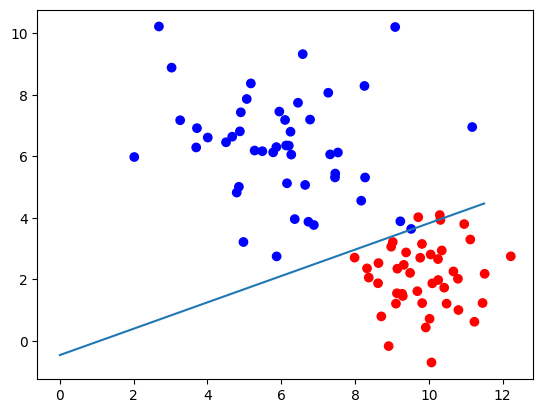

In [21]:
fig, axes = plt.subplots()
axes.scatter(X_train[:, 0], X_train[:, 1], color=['red' if y == -1 else 'blue' for y in Y_train])
x = np.arange(0, 12, 0.5)
w = hsvm.w
b = hsvm.b
axes.plot(x, -w[0] / w[1] * x - b / w[1])

### Lagrangian Quadratic Programming Suboptimal Solution

Artificial Bee Colony can be used to find a suboptimal solution for the quadratic constrained programming problem

In [ ]:
!pip install beecolpy

  Preparing metadata (setup.py) ... done
  Created wheel for beecolpy: filename=beecolpy-2.3.2-py3-none-any.whl size=17964 sha256=ce2b763541ee9c5b0054f417a9140a8d0d618ef91da72b9c932bd861b0b65e35
  Stored in directory: /root/.cache/pip/wheels/6f/00/bb/55023875d7b30110c5f4478420cd5814206dbc9533839160b5
Successfully built beecolpy


In [ ]:
from beecolpy import abc


def mulmat(a: np.array, M: np.array) -> np.array:
    return (M.T * a).T


class CSVM:
    lambdas: np.array
    w: np.array
    b: float

    def fit(self, X: np.array, Y: np.array):
        def obj_func(position) -> float:
            nonlocal X, Y
            lambdas = np.array(position)
            temp = mulmat(lambdas * Y, X)
            return np.sum(lambdas) - 1/2 * np.sum(np.inner(temp, temp)) - np.abs(np.sum(Y * lambdas))

        d = Y.size
        self.X = X
        self.Y = Y

        abc_obj = abc(
            function=obj_func,
            boundaries=[(0, 100)]*d,
            colony_size=100,
            scouts=0.5,
            iterations=500,
            min_max='max',
            nan_protection=True,
            log_agents=True,
            seed=None,
        )

        abc_obj.fit() #Execute the algorithm
        self.lambdas = np.array(abc_obj.get_solution())

        # Set up b and omega
        bs = []
        for k in np.where(self.lambdas > 0)[0]:
            x_k = X[k, :]
            y_k = Y[k]
            bs.append(y_k - np.sum( mulmat(Y * self.lambdas, X).dot(x_k) ))
        self.w = np.sum(mulmat(Y * self.lambdas, X), axis=0)
        self.b = np.mean(bs)


    def predict(self, X: np.array) -> np.array:
        return np.sign(X.dot(self.w) + np.ones(self.lambdas.shape) * self.b)



In [ ]:
csvm = CSVM()
csvm.fit(X_train, Y_train)

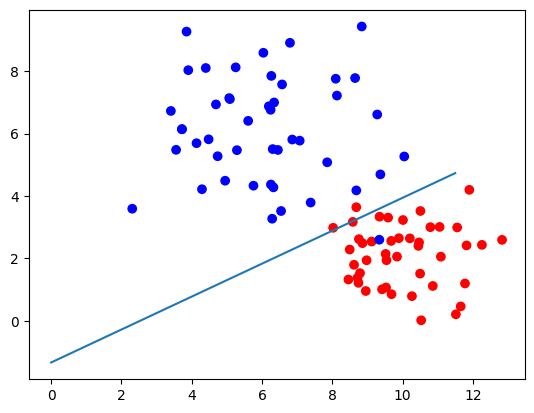

In [ ]:
fig, axes = plt.subplots()
axes.scatter(X_train[:, 0], X_train[:, 1], color=['red' if y == -1 else 'blue' for y in Y_train])
x = np.arange(0, 12, 0.5)
w = csvm.w
b = csvm.b
axes.plot(x, -w[0] / w[1] * x - b / w[1])

### Iris Classification using `sklearn`

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

data, target = load_iris(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=.3)

In [44]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(clf.best_params_, clf.best_score_)
svc = clf.best_estimator_

Y_pred = svc.predict(X_test)
print(f"Metrics:\n\taccuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"\tprecision: {precision_score(Y_test, Y_pred, average=None)}")
print(f"\trecall: {recall_score(Y_test, Y_pred, average=None)}")
print(f"\tf1: {f1_score(Y_test, Y_pred, average=None)}")

{'C': 1, 'kernel': 'linear'} 0.980952380952381
Metrics:
	accuracy: 0.9555555555555556
	precision: [1.   0.9  0.95]
	recall: [1.   0.9  0.95]
	f1: [1.   0.9  0.95]
